# Feed-Forward Neural Network
----

In [59]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

In [2]:
# Load the datasets
train_ds = datasets.MNIST(root='./data',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
test_ds = datasets.MNIST(root='./data',
                          train=False,
                          transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


Sample Size: torch.Size([100, 1, 28, 28]) and Output Size: torch.Size([100])


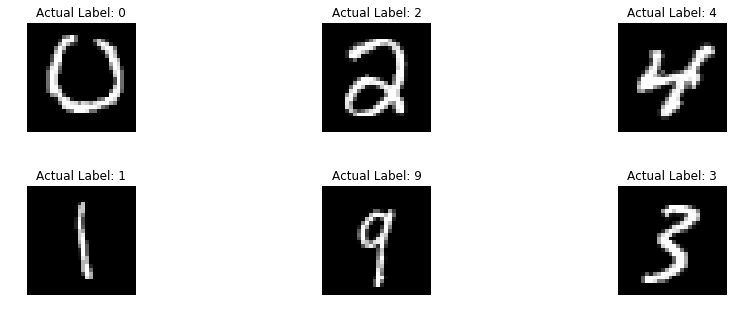

In [60]:
# Make the data iterable
batch_size = 100
n_iters = 3000
epochs = int(n_iters / (len(train_ds) / batch_size))
train_loader = torch.utils.data.DataLoader(dataset=train_ds,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_ds,
                                          batch_size=batch_size,
                                          shuffle=False)
train_iter = iter(train_loader)
features, labels = train_iter.next()
# Hyperparameters
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
alpha = 0.001
total_steps = len(train_loader)

print(f"Sample Size: {features.shape} and Output Size: {labels.shape}")
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(features[i][0], cmap='gray')
    plt.title(f"Actual Label: {labels[i].numpy()}")
    plt.axis('off')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [46]:
# Build the model
class NeuralNet(nn.Module):
    def __init__(self, in_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(in_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # Don't need to use the non linear layer in the alst layer because crossentropy will 
        # automatically use a softmax layer
        return out

In [80]:
model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=alpha)
losses = []
# Training loop
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape the samples in the shape of (100, 28*28)
        images = images.reshape(-1, 28*28)
        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        losses.append(loss)
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print(f"Epoch: {epoch+1}/{epochs}, Step: {i+1}/{total_steps}, Loss: {loss.item():.4f}")        

Epoch: 1/5, Step: 100/600, Loss: 0.3182
Epoch: 1/5, Step: 200/600, Loss: 0.2580
Epoch: 1/5, Step: 300/600, Loss: 0.2737
Epoch: 1/5, Step: 400/600, Loss: 0.3537
Epoch: 1/5, Step: 500/600, Loss: 0.2251
Epoch: 1/5, Step: 600/600, Loss: 0.2157
Epoch: 2/5, Step: 100/600, Loss: 0.1595
Epoch: 2/5, Step: 200/600, Loss: 0.1269
Epoch: 2/5, Step: 300/600, Loss: 0.1982
Epoch: 2/5, Step: 400/600, Loss: 0.1763
Epoch: 2/5, Step: 500/600, Loss: 0.0835
Epoch: 2/5, Step: 600/600, Loss: 0.2100
Epoch: 3/5, Step: 100/600, Loss: 0.1213
Epoch: 3/5, Step: 200/600, Loss: 0.2299
Epoch: 3/5, Step: 300/600, Loss: 0.1474
Epoch: 3/5, Step: 400/600, Loss: 0.2082
Epoch: 3/5, Step: 500/600, Loss: 0.1164
Epoch: 3/5, Step: 600/600, Loss: 0.1001
Epoch: 4/5, Step: 100/600, Loss: 0.1536
Epoch: 4/5, Step: 200/600, Loss: 0.1259
Epoch: 4/5, Step: 300/600, Loss: 0.0719
Epoch: 4/5, Step: 400/600, Loss: 0.1982
Epoch: 4/5, Step: 500/600, Loss: 0.1299
Epoch: 4/5, Step: 600/600, Loss: 0.0853
Epoch: 5/5, Step: 100/600, Loss: 0.0965


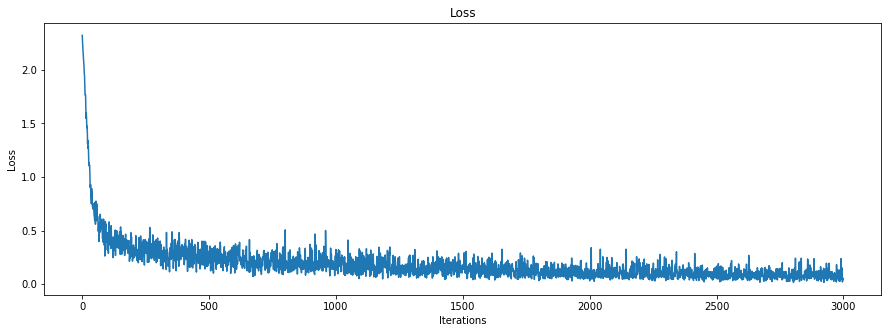

In [81]:
plt.plot(losses)
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

In [82]:
# Evaluate the model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        # value, index
        val, predictions = torch.max(outputs, 1) # (out, dimension)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
accuracy = 100.0 * (n_correct / n_samples)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 97.22
